In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Dhiya\AppData\Local\Temp\ipykernel_1232\602810294.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)


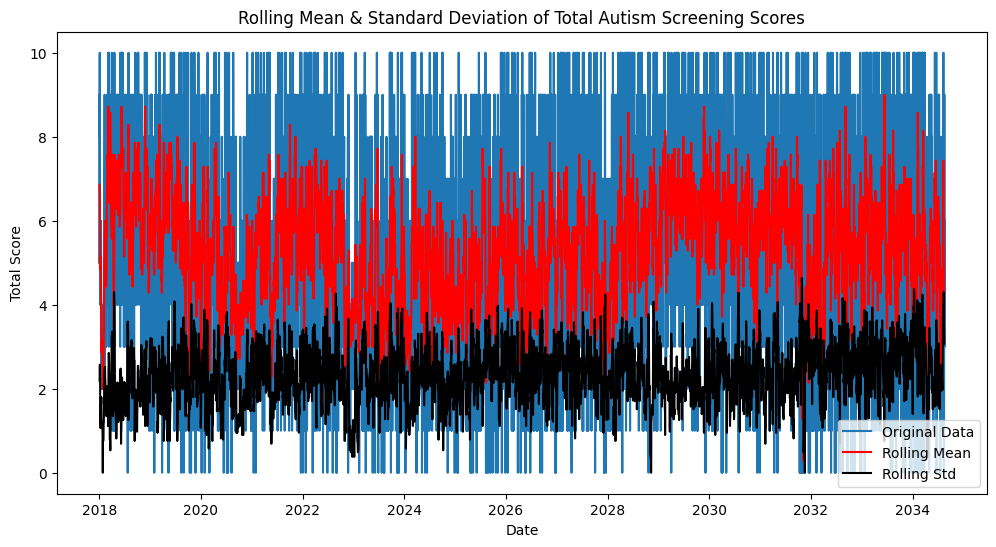


ADF Test Results:
ADF Statistic: -8.48643284791522
p-value: 1.3493872951190512e-13
Critical Values:
   1%: -3.431432767360979
   5%: -2.8620184842532526
   10%: -2.567024694623019
The time series is stationary (reject the null hypothesis).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller  # Corrected import for ADF test

# Load the Autism Screening for Toddlers dataset
df = pd.read_csv('superstores.csv')#file path

# Simulate a time series by adding a timestamp (since the dataset lacks explicit time data)
date_rng = pd.date_range(start='2018-01-01', periods=len(df), freq='D')  # Daily frequency for demo
df['timestamp'] = date_rng
df.set_index('timestamp', inplace=True)

# Calculate Total_Score as the sum of A1 to A10 scores
df['Total_Score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 
                        'A6', 'A7', 'A8', 'A9', 'A10']].sum(axis=1)

# Clean data (handle any potential missing values)
df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)

# Function to perform ADF test and print results
def test_stationarity(timeseries):
    # Perform ADF test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    # Interpret results
    if result[1] < 0.05:
        print("The time series is stationary (reject the null hypothesis).")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis).")

# Plot rolling statistics to visually inspect stationarity
rolling_mean = df['Total_Score'].rolling(window=7, center=True).mean()
rolling_std = df['Total_Score'].rolling(window=7, center=True).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Total_Score'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation of Total Autism Screening Scores')
plt.xlabel('Date')
plt.ylabel('Total Score')
plt.legend()
plt.show()

# Perform ADF test
print("\nADF Test Results:")
test_stationarity(df['Total_Score'])